In [197]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [198]:
import numpy as np
import pandas as pd

In [199]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [200]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [201]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [202]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [203]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [204]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [205]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

In [206]:
# Using the inspector to print the column names within the 'Measurement' table and its types
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [207]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [208]:
engine.execute('SELECT * FROM measurement').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

# Exploratory Climate Analysis

In [209]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
precp_date = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).all()
                        
precp_date

[('2017-08-23', 0.0),
 ('2017-08-23', 0.0),
 ('2017-08-23', 0.08),
 ('2017-08-23', 0.45),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.0),
 ('2017-08-21', 0.02),
 ('2017-08-21', None),
 ('2017-08-21', 0.56),
 ('2017-08-20', 0.0),
 ('2017-08-20', 0.01),
 ('2017-08-20', None),
 ('2017-08-19', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-19', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-18', 0.06),
 ('2017-08-18', None),
 ('2017-08-17', 0.0),
 ('2017-08-17', 0.05),
 ('2017-08-17', 0.01),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.0),
 ('2017-08-16', 0.07),
 ('2017-08-16', 0.12),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.02),
 ('2017-08-15', 0.0),
 ('2017-08-15', 0.06),
 ('2017-08-15', 0.32),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.01),
 ('2017-08-14', 0.08),
 ('2017-08-14', 0.0),
 ('2017-08-14', 0.22),
 ('2017-08-13', 0.0),
 ('2017-08-13', None),
 ('2017-08-13', 0.0),
 ('2017-08-13', 0.0),
 ('2017

In [210]:
# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
year_ago_precp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).\
                      order_by(Measurement.date.desc()).all()

year_ago_precp_data

# Save the query results as a Pandas DataFrame and set the index to the date column
year_ago_precp_df = pd.DataFrame(year_ago_precp_data)
year_ago_precp_df = year_ago_precp_df.set_index('date')
year_ago_precp_df.head()

# Sort the dataframe by date
#year_ago

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00


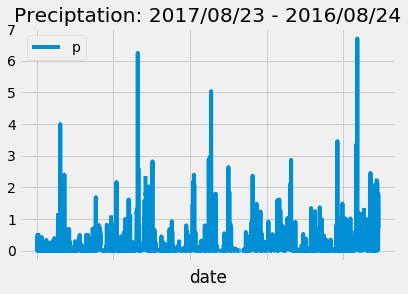

In [211]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = year_ago_precp_df.plot()
ax.set_title("Preciptation: 2017/08/23 - 2016/08/24")
ax.legend("precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [212]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_ago_precp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [213]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [214]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.id,Measurement.station, func.count(Measurement.station)).\
                        group_by(Measurement.station).order_by(func.count(Measurement.station).\
                        desc()).all()
most_active_stations

[(12188, 'USC00519281', 2772),
 (1, 'USC00519397', 2724),
 (2725, 'USC00513117', 2709),
 (9519, 'USC00519523', 2669),
 (16939, 'USC00516128', 2612),
 (5434, 'USC00514830', 2202),
 (14960, 'USC00511918', 1979),
 (7636, 'USC00517948', 1372),
 (9008, 'USC00518838', 511)]

In [215]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                                          func.avg(Measurement.tobs)).\
                                          filter(Measurement.station == 'USC00519281').all()
most_active_station_stats

[(54.0, 85.0, 71.66378066378067)]

In [216]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

most_active_station_year = session.query(Measurement.tobs).\
                filter(Measurement.station == 'USC00519281').\
                filter(Measurement.date >= year_ago).all()

most_active_station_year_df = pd.DataFrame(most_active_station_year)
most_active_station_year_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


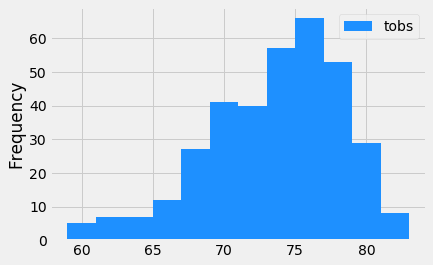

In [217]:
#histogram
plt.figure()
plt.hist(most_active_station_year_df['tobs'], bins=12, histtype='bar',rwidth = 1.0,color = 'dodgerblue')
plt.legend(['tobs'])
plt.ylabel('Frequency')
plt.show()

![precipitation](Images/station-histogram.png)

In [218]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [219]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
c_temps = calc_temps('2016-08-23', '2017-08-23')
c_temps

[(58.0, 74.59058295964125, 87.0)]

In [220]:
c_temps_tmin = c_temps[0][0]
c_temps_tave = c_temps[0][1]
c_temps_tmax = c_temps[0][2]


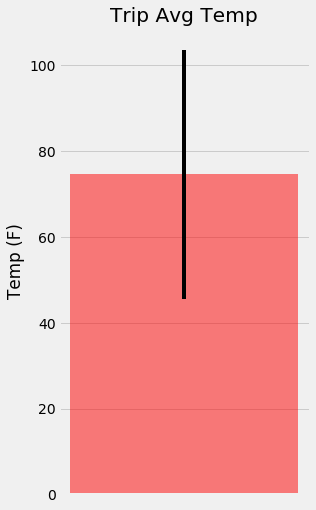

In [221]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.figure(figsize=(4,8))
plt.title('Trip Avg Temp')
plt.ylabel('Temp (F)')
plt.xticks([])
plt.bar(1, c_temps_tave, yerr=(c_temps_tmax - c_temps_tmin), color='r', alpha=0.5)
plt.show()

In [231]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_per_station = session.query(Station.station, func.sum(Measurement.prcp), Station.name, Station.elevation, 
                                           Station.latitude, Station.longitude).\
                                        filter(Measurement.station == Station.station).\
                                        filter(Measurement.date >= '2016-08-23').\
                                        filter(Measurement.date <= '2017-08-23').\
                                        group_by(Station.station).\
                                        order_by(func.sum(Measurement.prcp).desc()).all()

total_rainfall_per_station

[('USC00516128',
  147.81000000000006,
  'MANOA LYON ARBO 785.2, HI US',
  152.4,
  21.3331,
  -157.8025),
 ('USC00519281',
  70.03000000000003,
  'WAIHEE 837.5, HI US',
  32.9,
  21.45167,
  -157.84888999999998),
 ('USC00513117',
  48.510000000000026,
  'KANEOHE 838.1, HI US',
  14.6,
  21.4234,
  -157.8015),
 ('USC00519523',
  38.01,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  19.5,
  21.33556,
  -157.71139),
 ('USC00514830',
  33.239999999999995,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  7.0,
  21.5213,
  -157.8374),
 ('USC00519397',
  16.089999999999986,
  'WAIKIKI 717.2, HI US',
  3.0,
  21.2716,
  -157.8168),
 ('USC00517948', 4.59, 'PEARL CITY, HI US', 11.9, 21.3934, -157.9751)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
